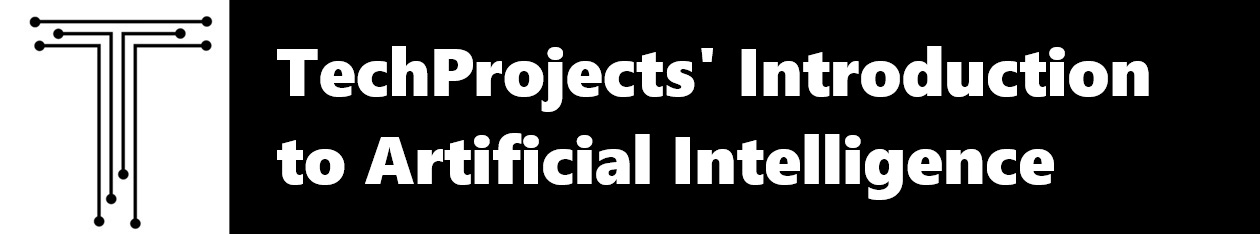

# Image Generation using Pretrained diffusion models

Diffusion models are how AI tools like DALL-E or ChatGPT generate images, given a prompt, like "Draw a flower on top of a mountain", it will proceed and create a unique photo which will resamble the given prompt.

The process of creating an image starts with "noise", basically an image full of random data. The following image, is one possibility which uses a type of noise called "perlin noise":


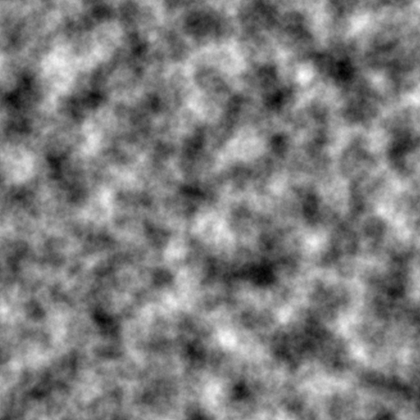

From  this image, it proceeds to "remove the noise, so that the image which has what you specified in the prompt is less noisy". In other words, we are fooling the model by making it think that the noise is already an image of what you asked for, but it just has a lot of noise that needs to be removed. By doing this, the model will create what you asked without it realizing it is what we wanted.

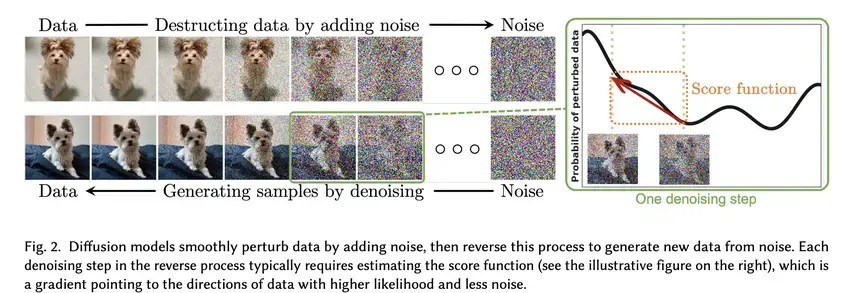

## Installing necessary libraries and accounts
To use a pretrained model we'll need several things. 

Python:
- https://www.python.org/downloads/

Now, download PyTorch, widely used and one of the most popular (if not the most) AI frameworks, created by facebook. (If possible, use CUDA if you have a NVIDIA GPU)
- https://pytorch.org/get-started

Last, let's install HugginFace, a library of pretrained models that are free and available to use:
Start by typing in your terminal:

```
pip install -U "huggingface_hub[cli]"
```

Meanwhile, go create an account:
- https://huggingface.co/join
Once created, go to: 
- https://huggingface.co/settings/tokens
Select "Create New Token" (top right), type a name (Whatever), and check all boxes in: Repositories, Inference and Collections. Then at the bottom, click "Create Token" and copy (Click the black "copy" button). Paste this token somewhere in your computer.

Once that finishes, type in a terminal:
```
huggingface-cli login
```
When prompted for a token, paste the previously copied token.

If it says "Valid Token" or something similar, you're all set!




We need to install three libraries, and we are all set, run the following line:

Useful info: We are currently in a jupyter notebook, so you can run code by clicking in a line like the one below and pressing CONTROL + ENTER in your keyboard

In [ ]:
%pip install diffusers accelerate transformers

## Running the code

Let's start by importing diffusers and downloading and loading a pretrained model from huggingface:

In [2]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", use_safetensors=True)

c:\Users\Joelg\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...:  86%|████████▌ | 6/7 [00:01<00:00,  5.57it/s]c:\Users\Joelg\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.07it/s]


#### If you have a NVIDIA GPU run the following. If you don't it will error out!

In [ ]:
pipeline.to("cuda")

In [4]:
prompt = "A Cat"

In [5]:
image = pipeline(prompt)

c:\Users\Joelg\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\clip\modeling_clip.py:480: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
100%|██████████| 50/50 [10:58<00:00, 13.16s/it]


Extract the image:

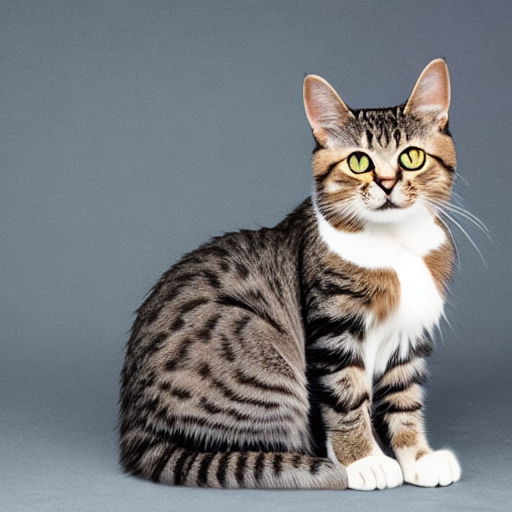

In [8]:
image.images[0]

Note that it takes a substantial ammount of time to generate the image, opposite to what happens in online tools. This is because your laptop doesn't have as much processing power as OpenAI's or Google's Datacenters, which use some custom hardware to speed up the process.